# Simulating Poisson processes and Brownian bridges

## Simulating an inhomogeneous Poisson process by thinning

#### Inhomogeneous Poisson process

The goal here is to experiment around the thinning of inhomogeneous Poisson processes. An $\textit{inhomogeneous Poisson process}$ (or non-homogeneous Poisson process) is a stochastic process $ \{ N(t) \}_{t \geq 0}$ with a time-varying intensity function $ \lambda(t) $ such that:    
     - **Incremental Independence:** For any $ 0 \leq t_1 < t_2 < \dots < t_n $, the increments $ N(t_2) - N(t_1), N(t_3) - N(t_2), \dots, N(t_n) - N(t_{n-1}) $ are independent.  
     - **Inhomogeneous Poisson Increment Property:** The number of events occurring in an interval $ (s, t] $, for $ s < t $, follows a Poisson distribution with mean
    $$
    \mathbb{E}[N(t) - N(s)] = \int_s^t \lambda(u) \, du
    $$
    That is,
    $$
    N(t) - N(s) \sim \text{Poisson} \left( \int_s^t \lambda(u) \, du \right).
    $$   
    - **Initial Condition:** $N(0) = 0 $.  
    - **Interarrival time** (or event time): The probability density function $f_{T_1}(t_0,t)$ of the first arrival time $T_1$ after $t_0$ is: $$f_{T_1}(t)=\lambda(t)e^{-\Lambda(t)}, \text{ with }\Lambda(t)=\int_{t_0}^t \lambda(u) \, du.$$

#### The thinning method
An inhomogeneous Poisson process of rate $\lambda(t)\leq \lambda_M, \forall t$ can be simulated by considering a bound homogeneous Poisson process of rate $\lambda_M$:

- starting at $\tau_{0}=0$
- generating the interarrival time $\tau$ of the bound Poisson process of rate $\lambda_M$ by inversion sampling of the exponential law of parameter $\lambda_M$
- resampling this event as a true event with probability $\frac{\lambda(\tau+\tau_0)}{\lambda_M} $
- If $\tau+\tau_0$ is resampled as the interarrival time of the true Poisson process, output $\tau+\tau_0$. If not, update $\tau_0 = \tau_0 + \tau$ and repeat the previous steps.

Refs:

(1) APA Lewis, P. A., & Shedler, G. S. (1979). Simulation of nonhomogeneous Poisson processes by thinning. Naval Research Logistics Quarterly, 26(3), 403-413.

### Questions
1. Show that the thinning simulation method is correct. (Hint: Adapt exercise 5.1)

We must verify that $N(t) - N(s) \sim \text{Poisson}\left( \int_s^t \lambda(u) du \right)$. Let $N_M$ denote a Poisson process with rate $\lambda_M$, meaning that for any $t > s$, the increment $N_M(t) - N_M(s)$ follows the distribution
$$
N_M(t) - N_M(s) \sim \text{Poisson}(\lambda_M(t-s)).
$$

By definition, $N_M$ has independent increments. Consequently, the derived process $N$ also inherits independent increments since the increments of $N$ correspond to accepting or rejecting the increments of $N_M$.

Conditioning on $N_M(t) - N_M(s) = n$, the distribution of $N(t) - N(s)$ is Binomial with parameter
$$
p = \frac{\int_s^t \lambda(u) \, du}{(t-s)\lambda_M} \Rightarrow
\mathbb{P}\big(N(t) - N(s) = k \mid N_M(t) - N_M(s) = n \big) = \binom{n}{k} p^k (1-p)^{n-k}.
$$

Using that $\mathbb{P}\big(N(t) - N(s) = k\big) = \sum_{n=k}^\infty \mathbb{P}\big(N(t) - N(s) = k \mid N_M(t) - N_M(s) = n \big)$, we get:
$$
\begin{aligned}
    \mathbb{P}\big(N(t) - N(s) = k\big) &= \sum_{n=k}^\infty \binom{n}{k} p^k (1-p)^{n-k} \, \mathbb{P}\big(N_M(t) - N_M(s) = n\big) \\
    &= \sum_{n=k}^\infty \binom{n}{k} p^k (1-p)^{n-k} \frac{[\lambda_M(t-s)]^n}{n!} e^{-\lambda_M(t-s)} \\
    &= \sum_{n=k}^\infty \frac{1}{k! (n-k)!} p^k (1-p)^{n-k} [\lambda_M(t-s)]^n e^{-\lambda_M(t-s)} \\
    &= \frac{p^k}{k!} [\lambda_M(t-s)]^k e^{-\lambda_M(t-s)} \sum_{n=k}^\infty \frac{1}{(n-k)!} \big((1-p)\lambda_M(t-s)\big)^{n-k}
\end{aligned}
$$

By substituting $m = n-k$, the summation becomes:
$$
\begin{aligned}
    \mathbb{P}\big(N(t) - N(s) = k\big) &= \frac{p^k}{k!} [\lambda_M(t-s)]^k e^{-\lambda_M(t-s)} \sum_{m=0}^\infty \frac{1}{m!} \big((1-p)\lambda_M(t-s)\big)^m \\
    &= \frac{p^k}{k!} [\lambda_M(t-s)]^k e^{-\lambda_M(t-s)} e^{(1-p)\lambda_M(t-s)}
\end{aligned}
$$

Since $p^k [\lambda_M(t-s)]^k = \left( \int_s^t \lambda(u) \, du \right)^k$, we can rewrite the expression as:
$$
\mathbb{P}\big(N(t) - N(s) = k\big) = \frac{1}{k!} \left( \int_s^t \lambda(u) \, du \right)^k e^{-\int_s^t \lambda(u) \, du}
$$

Thus, we have:
$$
N(t) - N(s) \sim \text{Poisson}\left( \int_s^t \lambda(u) \, du \right)
$$


Library importation

In [1]:
import numpy as np
import random, math
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.lines as mlines
from matplotlib.ticker import FixedLocator

from scipy.integrate import quad
import seaborn as sns

plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 8

We consider the problem of simulating from the first event time of a non-homogenous Poisson process of rate $\lambda$:
$$\lambda(t) = \max(\sin(t),0), \forall t\geq 0 $$

### Questions
2. Find $\lambda_M$ such that $\lambda_M\geq \lambda(t), \forall t$  
In the code below, please,
3. Assign a correct value to `self.lambda_M`
4. Code the `homogeneousPP_generation` routine which outputs the interarrival time of a Poisson process of homogeneous rate `self.lambda_M` by inversion sampling
5. Code the `thinning_generation` routine which outputs the interarrival time of the inhomogeneous Poisson process of rate $\lambda(t)$ (given by the routine `lambda_rate`) by thinning using the PP of rate $\lambda_M$
6. Code the `theoretical_arrival` routine which outputs the probability density of a given time to be the interarrival time of the target inhomogeneous PP


Question 2:

Since $\sin(t) \geq 1$ for all $t$, we have that $\lambda(t) = \max(\sin(t),0) \geq 1$ and hence $\lambda_M = 1$

Question 3:

Parameter initialization in the code.

Question 4:

Interarrival times are exponentially distributed with rate $\lambda_M$. Let $X \sim Exp(\lambda_M)$. We have the following cdf:
$$
F_X (x) = 1 - e^{-\lambda_M x} \Rightarrow F_X^{-1} (x) = -\frac{1}{\lambda_M} log(1-x)
$$
We thus take $U \sim Unif([0,1])$ and use $-U$ to get the inverse of the cdf.

Question 5:

Implementation in the code.

Question 6:

The pdf is given by $f(t) = \lambda(t) e^{-\int_0^t \lambda(u) du}$.

In [2]:
class max_cos_PP:
    def __init__(self,lambda_M = 1):
        # Parameter initialization
        self.lambda_M = lambda_M
    
    def lambda_rate(self,t):
        return max(0,math.sin(t))
    
    def homogeneousPP_generation(self):
        # Write a routine generating the event times of the
        # homogeneous PP of rate lambda_M
        U = np.random.rand()
        return -np.log(U)/self.lambda_M
        
    def direct_generation(self):
        # Routine generating by inversion the event times
        # of the PP of rate lambda    
        ran_tot = -math.log(random.uniform(0.0,1.0))
        tau = 2.0 * math.pi * (ran_tot//2)
        ran_tot = ran_tot % 2.0
        tau +=  math.acos(1-ran_tot)
        return tau
        
    def thinning_generation(self):
        # Write a routine generating the event times of the
        # PP of rate lambda by thinning
        tau_0 = 0
        tau = self.homogeneousPP_generation()
        while np.random.rand() > self.lambda_rate(tau+tau_0)/self.lambda_M:
            tau_0 += tau
            tau = self.homogeneousPP_generation()
        return tau_0 + tau
            
    def theoretical_arrival(self,t):
        # Write a routine generating the probability 
        # value for t to be the first arrival time 
        # of the target PP
        int, _ = quad(self.lambda_rate, 0, t)
        return self.lambda_rate(t) * math.exp(-int) 

### Questions
7. Compare the normed histograms of the interarrival times obtained with the `direct_generation`(directly sampling by inversion of the inhomogeneous PP), the `thinning_generation` and the theoretical value. Compare to the normed histogram of the interarrival times of the bound homogeneous PP of rate $\lambda_M$.

We see that the direct generation and thinning generation histograms closely follow the theoretical one, confirming their validity to simulate inhomogeneous poisson process. We also see that the distribution for homogeneous process does not has multiple peaks as the non homogeneous one does, and it only assumes lower interarrival time values.

C:\Users\sabri\AppData\Local\Temp\ipykernel_31980\296736149.py:38: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  int, _ = quad(self.lambda_rate, 0, t)


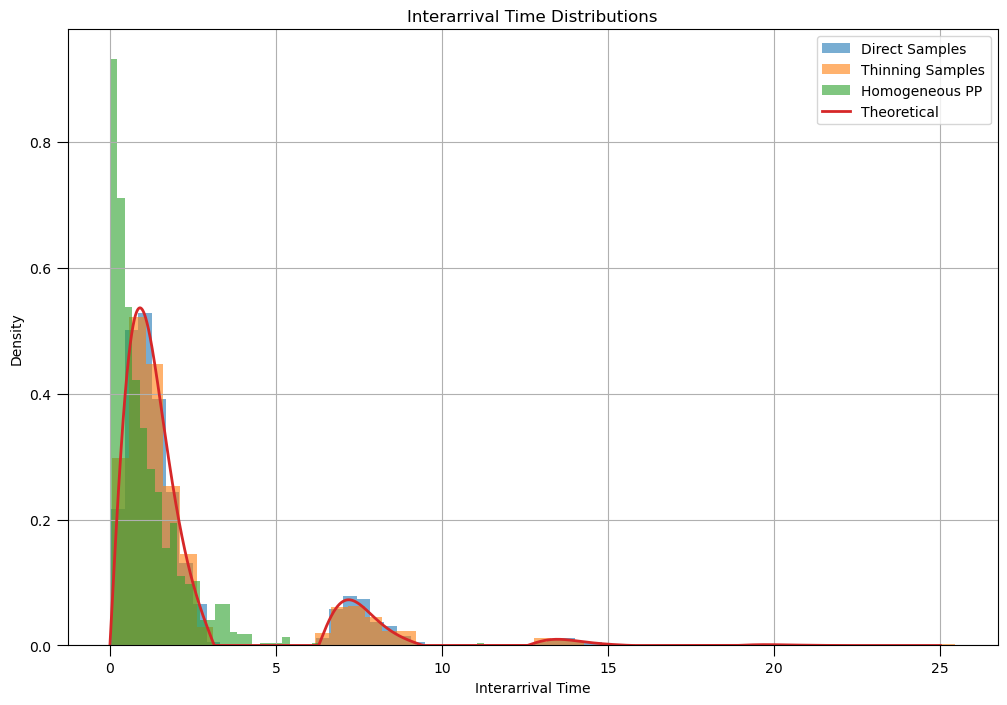

In [3]:
l_M = 1 
poisson_process = max_cos_PP(lambda_M=l_M)

n_samples = 1000
direct_samples = [poisson_process.direct_generation() for _ in range(n_samples)]
thinning_samples = [poisson_process.thinning_generation() for _ in range(n_samples)]
homogeneous_samples = [poisson_process.homogeneousPP_generation() for _ in range(n_samples)]

t_values = np.linspace(0, 25, 10000)
theoretical_pdf = [poisson_process.theoretical_arrival(t) for t in t_values]

plt.figure(figsize=(12, 8))
plt.hist(direct_samples, bins=50, density=True, alpha=0.6, label='Direct Samples')
plt.hist(thinning_samples, bins=50, density=True, alpha=0.6, label='Thinning Samples')
plt.hist(homogeneous_samples, bins=50, density=True, alpha=0.6, label='Homogeneous PP')
plt.plot(t_values, theoretical_pdf, label='Theoretical', linewidth=2)

plt.xlabel('Interarrival Time')
plt.ylabel('Density')
plt.title('Interarrival Time Distributions')
plt.legend()
plt.grid()
plt.show()

8. Compare the cumulative histograms of the first event times obtained with the `direct_generation`(directly sampling by inversion of the inhomogeneous PP), the `thinning_generation` and the theoretical values. Compare also to the cumulative histogram of the first event times of the bound homogeneous PP of rate $\lambda_M$. Confirm why the thinning method is correct.

We see again that the direct generation and thinning generation cumulative density functions closely follow the theoretical one, which shows the thinning method is consistent with what was expected.

C:\Users\sabri\AppData\Local\Temp\ipykernel_31980\1757997052.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(lambda_rate, 0, t)  # Numerical integration of lambda(t)
c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

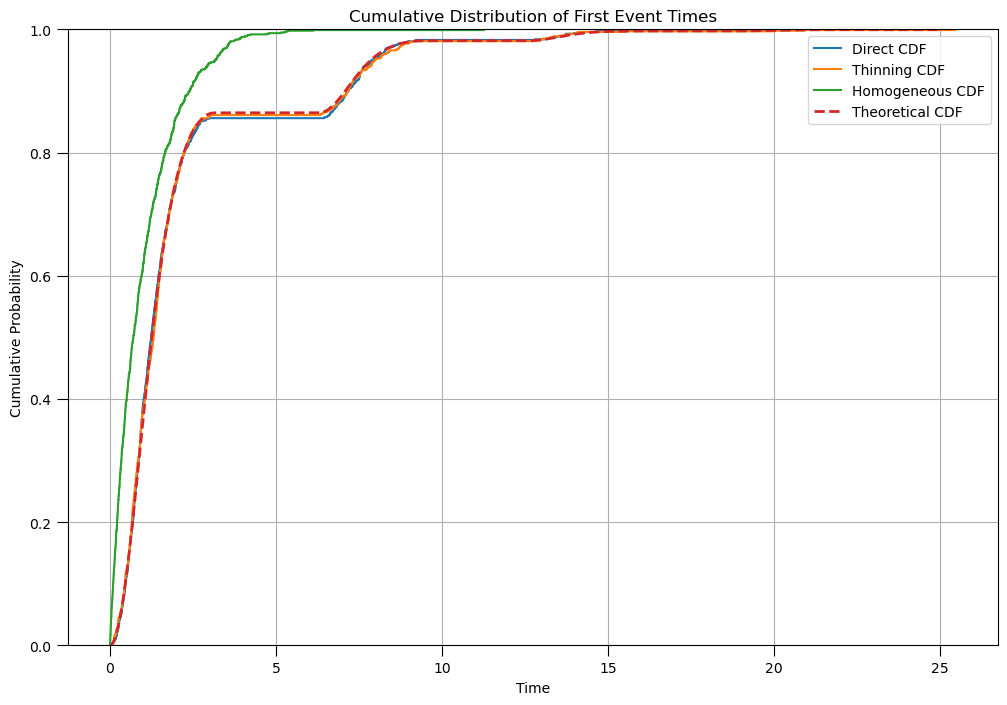

In [4]:
t_values = np.linspace(0, 25, 1000)

# Theoretical CDF
def lambda_rate(t):
    return max(0, np.sin(t))
def cumulative_rate(t):
    result, _ = quad(lambda_rate, 0, t)  # Numerical integration of lambda(t)
    return 1 - np.exp(-result)
theoretical_cdf = [cumulative_rate(t) for t in t_values]

plt.figure(figsize=(12, 8))

sns.ecdfplot(direct_samples, label = 'Direct CDF')
sns.ecdfplot(thinning_samples, label ='Thinning CDF')
sns.ecdfplot(homogeneous_samples, label ='Homogeneous CDF')
plt.plot(t_values, theoretical_cdf, label='Theoretical CDF', linewidth=2, linestyle='--')

plt.xlabel('Time')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of First Event Times')
plt.legend()
plt.grid()
plt.show()

9. **[BONUS]** How is the number of generated bound events required to resample a true one behaving with $\lambda_M$? Please, provide a plot.
10. **[BONUS]** What is a good choice for $\lambda_M$?

Question 9:

In the thining algorithm, an event is accepted with probability $\frac{\lambda (t)}{\lambda_M}$, and whenever we choose $\lambda_M >>> max(\lambda (t))$, the acceptance rate becomes smaller, meaning most of the generated events are rejected and the average number of bound events needed increases. See plot below.

Question 10:

We should choose the smallest value possible which is $\lambda_M = 1$.

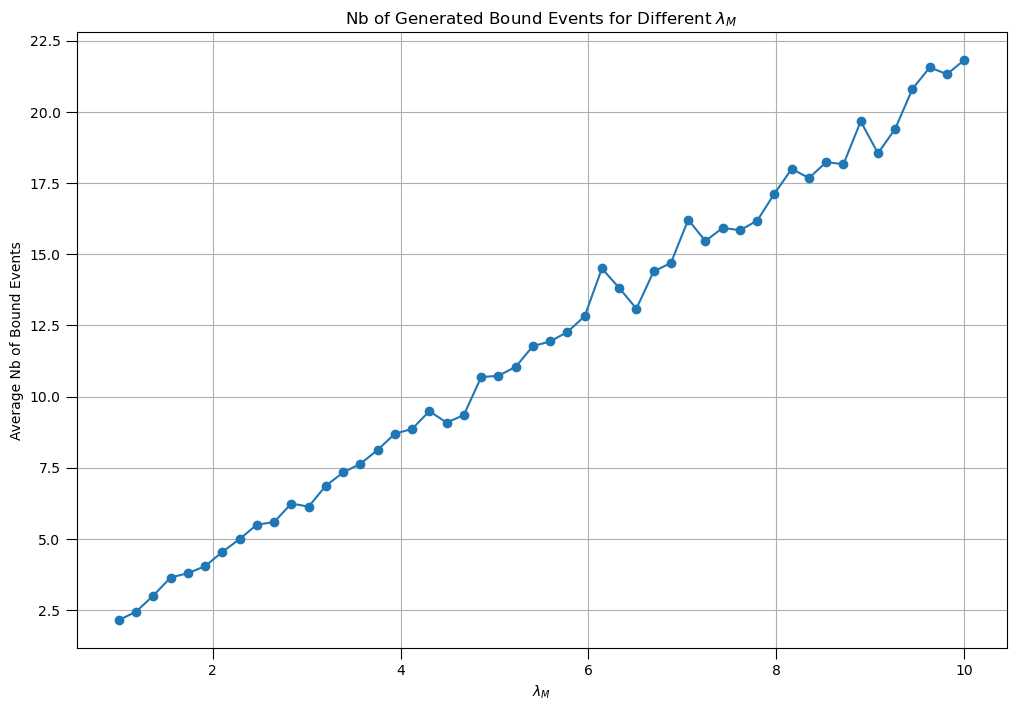

In [5]:
lambda_M_values = np.linspace(1, 10, 50)
n_trials = 1000

def avg_bound_events(lambda_M, n_trials):
    poisson_process = max_cos_PP(lambda_M=lambda_M)
    bound_counts = []
    for _ in range(n_trials):
        bound_count = 0
        tau_0 = 0
        tau = poisson_process.homogeneousPP_generation()
        while np.random.rand() > poisson_process.lambda_rate(tau + tau_0) / lambda_M:
            bound_count += 1
            tau_0 += tau
            tau = poisson_process.homogeneousPP_generation()
        bound_counts.append(bound_count + 1)
    return np.mean(bound_counts)

avg_bound_events_per_lambda = [avg_bound_events(l_M, n_trials) for l_M in lambda_M_values]

plt.figure(figsize=(12, 8))
plt.plot(lambda_M_values, avg_bound_events_per_lambda, marker='o')
plt.xlabel(r'$\lambda_M$')
plt.ylabel('Average Nb of Bound Events')
plt.title('Nb of Generated Bound Events for Different $\lambda_M$')
plt.grid()
plt.show()

## Generating Brownian motion intermediate position

### Brownian bridge

We consider a sequence 
$$(B_{t_1},B_{t_2},\dots,B_{t_{n+1}}), \text{ with } t_1<t_2<\dots<t_{n+1}$$ 
of successive positions of a Brownian motion. In exercise 6.4, we saw how to sample the intermediate positions, i.e. $$(B_{t_1},\mathbf{B_{s_1}},B_{t_2},\mathbf{B_{s_2}},\dots,\mathbf{B_{s_n}},B_{t_{n+1}}), \text{ with } t_1<s_1<t_2<s_2<\dots<s_n<t_{n+1}.$$

For an intermediate position at time $s_k$, 
$$ B_{s_k} = \frac{t_{k+1}-s_k}{t_{k+1}-t_k}B_{t_k} + \frac{s_k - t_k}{t_{k+1}-t_k}B_{t_{k+1}} + \sqrt{t_{k+1}-t_k} Z,$$
with, $Z\sim \mathcal{N}\left(0,\frac{(t_{k+1}-s_k)(s_k-t_k)}{t_{k+1}-t_k)^2}\right).
$

### Questions
In the code below, please,

11. Code the `intermediate_position` routine which generates an intermediate position at a given time between two successive positions of the Brownian motions.
12. Code the `complete_motion` routine which generates the intermediate middle position between all two successive positions of a given Brownian motion sequence

In [6]:
class brownian_motion:
    def __init__(self,):
        # Parameter initialization
        pass
    
    def position_sequence(self, xinit, t_arr):
        # outputs a sequence of successive positions of 
        # a Brownian motion at times set by the array t_arr and starting 
        # from a given initial position xinit
        dt_list = t_arr[1:] - t_arr[:-1]
        # The Brownian increments are normally distributed 
        # with mean 0 and variance the time elapsed between 
        # two positions
        dB = np.sqrt(dt_list) * np.random.randn(len(t_arr)-1)
        B = np.insert(xinit + np.cumsum(dB),0,xinit)
        return B
    
    def intermediate_position(self, s, t1, t2, Bt1, Bt2):        
        # Write a routine generating the position of the Brownian
        # motion at time s when given its positions Bt1 and Bt2 
        # respectively at time t1 and t2
        Z = np.random.normal(0, np.sqrt((t2-s)*(s-t1))/(t2-t1))
        w_1 = (t2 - s) / (t2 - t1)
        w_2 = (s - t1) / (t2 - t1)
        return w_1 * Bt1 + w_2 * Bt2 + np.sqrt(t2-t1) * Z
    
    def complete_motion(self, t_arr, Bt):     
        # Write a routine generating the intermediate middle-time 
        # position of the Brownian motion having as a sequence 
        # of positions Bt at times given by the sequence t_arr
        motion_arr = [t_arr[0]]
        time_arr = [Bt[0]]
        for i in range(1,len(Bt)):
            s = (t_arr[i-1]+t_arr[i])/2
            mid_pos = self.intermediate_position(s, t_arr[i-1], t_arr[i], Bt[i-1], Bt[i])
            time_arr.append(s)
            time_arr.append(t_arr[i])
            motion_arr.append(mid_pos)
            motion_arr.append(Bt[i])
        return np.array(time_arr), np.array(motion_arr)

## Questions
13. Generate the positions at time $0,1,2, \dots 10$ (time increment = 1) of a Brownian motion and complete the sequence of the positions of the sequence down to a time increment of 0.03125. Plot an example.
14. Check your result by comparing from samples obtained by direct simulation and obtained by the iterated generation:  
- the distribution of the position value at $t=5-0.03125$. Add the expected theoretical distribution to the plot.
- the distribution of the maximal absolute position value obtained. 
-  the distribution of the time $t$ at which the maximal absolute position value is reached.

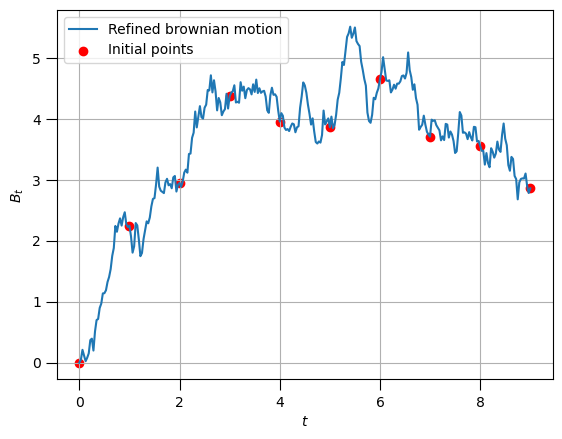

In [7]:
t_arr_0 = np.arange(0, 10, 1)
b_motion = brownian_motion()
B_t_0 = b_motion.position_sequence(0, t_arr_0)

t_arr = t_arr_0.copy()
B_t = B_t_0.copy()

while t_arr[1] > 0.03125:
    t_arr, B_t = b_motion.complete_motion(t_arr, B_t)
    
plt.plot(t_arr, B_t, label = 'Refined brownian motion')
plt.scatter(t_arr_0, B_t_0, color = 'red', label = 'Initial points')
plt.legend()
plt.ylabel("$B_t$")
plt.xlabel("$t$")
plt.grid()

- the distribution of the position value at $t=5-0.03125$. Add the expected theoretical distribution to the plot.

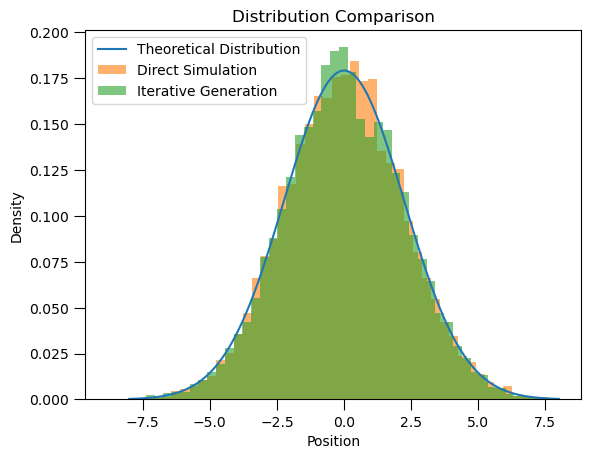

In [8]:
N = 10000
b_motion = brownian_motion()
t_target = 5 - 0.03125

direct_sim = []
iterative_sim = []

for n_sim in range(N):
    t_direct = np.arange(0, 10, 0.03125)
    Bt_direct = b_motion.position_sequence(0, t_direct)
    direct_sim.append(Bt_direct[np.where(t_direct == t_target)[0][0]])
    
    t_arr_0 = np.array([i for i in range(11)])
    B_t_0 = b_motion.position_sequence(0, t_arr_0)
    t_arr = t_arr_0.copy()
    B_t = B_t_0.copy()
    while t_arr[1] > 0.03125:
        t_arr, B_t = b_motion.complete_motion(t_arr, B_t)
    iterative_sim.append(B_t[np.where(t_arr == 5 - 0.03125)[0][0]])

x = np.linspace(-8, 8, 500)
# Theoretical for Bt following N(0,t)
plt.plot(x, 1 / np.sqrt(2 * np.pi * t_target) * np.exp(-x ** 2 / (2 * t_target)), label='Theoretical Distribution')
# Direct and Iterative
plt.hist(direct_sim, bins=50, alpha=0.6, label='Direct Simulation', density=True)
plt.hist(iterative_sim, bins=50, alpha=0.6, label='Iterative Generation', density=True)
plt.legend()
plt.title('Distribution Comparison')
plt.xlabel('Position')
plt.ylabel('Density')
plt.show()

- the distribution of the maximal absolute position value obtained. 

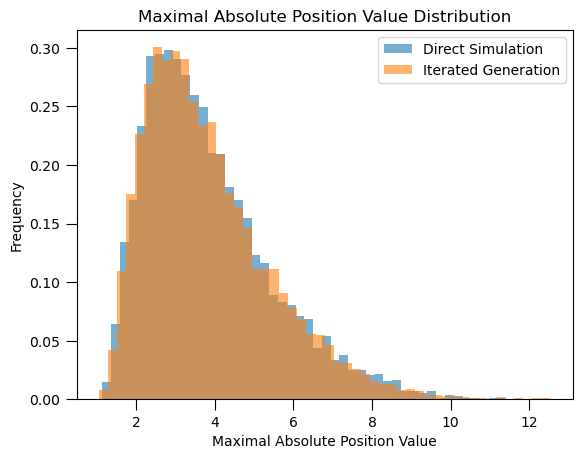

In [9]:
b_motion = brownian_motion()

max_direct = []
max_iterative = []

for n_sim in range(N):
    t_direct = np.arange(0, 10, 0.03125)
    max_direct.append(np.max(np.abs(b_motion.position_sequence(0, t_direct))))
    
    t_arr_0 = np.array([i for i in range(11)])
    B_t_0 = b_motion.position_sequence(0, t_arr_0)
    t_arr = t_arr_0.copy()
    B_t = B_t_0.copy()
    while t_arr[1] > 0.03125:
        t_arr, B_t = b_motion.complete_motion(t_arr, B_t)
    max_iterative.append(np.max(np.abs(B_t)))

plt.hist(max_direct, bins=50, alpha=0.6, label="Direct Simulation", density=True)
plt.hist(max_iterative, bins=50, alpha=0.6, label="Iterated Generation", density=True)
plt.xlabel("Maximal Absolute Position Value")
plt.ylabel("Frequency")
plt.title("Maximal Absolute Position Value Distribution")
plt.legend()
plt.show()

-  the distribution of the time $t$ at which the maximal absolute position value is reached.

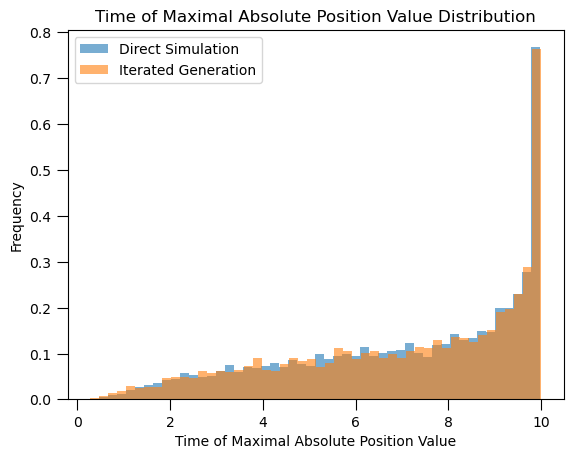

In [10]:
b_motion = brownian_motion()

t_direct = []
t_iterative = []

for n_sim in range(N):
    t_arr_direct = np.arange(0, 10, 0.03125)
    idx_direct = np.argmax(np.abs(b_motion.position_sequence(0, t_arr_direct)))
    t_direct.append(t_arr_direct[idx_direct])
    
    t_arr_0 = np.array([i for i in range(11)])
    B_t_0 = b_motion.position_sequence(0, t_arr_0)
    t_arr = t_arr_0.copy()
    B_t = B_t_0.copy()
    while t_arr[1] > 0.03125:
        t_arr, B_t = b_motion.complete_motion(t_arr, B_t)
    idx_iterative = np.argmax(np.abs(B_t))
    t_iterative.append(t_arr[idx_iterative])
    
plt.hist(t_direct, bins=50, alpha=0.6, label="Direct Simulation", density=True)
plt.hist(t_iterative, bins=50, alpha=0.6, label="Iterated Generation", density=True)
plt.xlabel("Time of Maximal Absolute Position Value")
plt.ylabel("Frequency")
plt.title("Time of Maximal Absolute Position Value Distribution")
plt.legend()
plt.show()